# 앙상블 기법

* 결정트리는 매우 쉽고 유연하게 적용될 수 있는 알고리즘입니다. 
* 또한 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적습니다. 
* 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며
* 이로 인해 과적합이 발생해 반대로 예측 성능이 저하될 수 있다는 단점이 있습니다. 

앙상블 기법은
* 예측 성능이 높아지도록 많이 성장된 한 개의 트리대신에
* 예측 성능이 상대적으로 떨어지는 **약한 학습기**를 **여러개 결합**해 
* 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키도록 만드는 기법입니다. 
* 앙상블 기법의 목표는
* 다양한 분류기의 예측 결과를 결합하면서 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것입니다.
* 넓은 의미로는 서로 다른 모델을 결합한 것들을 앙상블로 지칭하기도 합니다. 



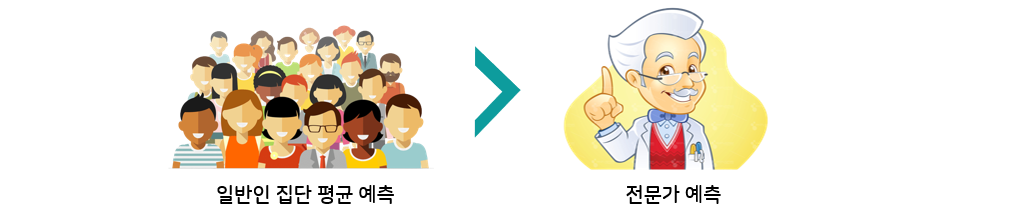

## 앙상블의 유형

* 일반적으로 보팅(Voting),배깅(Bagging),부스팅(Boosting)으로 구분할 수 있습니다. 
* 이외에도 스태킹(Stacking)등의 기법이 있습니다. 
* 대표적인 배깅은 랜덤 포레스트(Random Forest)알고리즘이 있으며,
* 부스팅은 그래디언트 부스팅, XGBoost, LightGBM 등이 있습니다. 
* 정형 데이터의 분류나 회귀에서는 GBM부스팅 계열의 앙상블이 전반적으로 높은 예측 성능을 나타냅니다. 


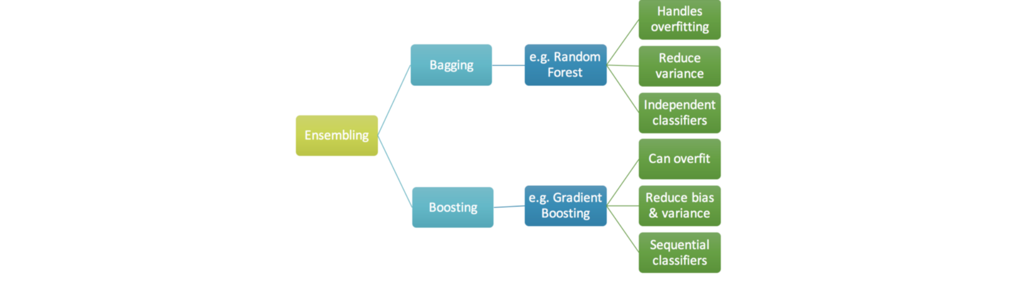


**베스트 머신러닝 알고리즘을 뽑으라면?**

당신의 원픽 알고리즘은? GrideSearchCV? DecisionTree? LogisticRegression?<br>
<br>
정형데이터에서 분류와 회귀를 예측할 때, 앙상블 기법이 적용된 알고리즘이 높은 성능을 보여줍니다.<br>
캐글 상위권에서 널리 사용되어 인기가 높아진 XGBoost, 이를 본따 마이크로소프트에서 만든 LightGBM이 좋은 성능을 보입니다. <br>
여기에 GrideSearchCV, RandomizedSearchCV등 CV계열과 결합하여 사용하면 좀 더 좋은 성능을 보여줍니다. <br>


## 보팅(Voting)과 배깅(Bagging)

* 보팅과 배깅은 여러 개의 분류기가 **투표**를 통해 최종 예측 결과를 결정하는 방식입니다. 
* 보팅은 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고,
* 배깅은 같은 유형의 알고리즘을 가진 분류기를 결합하는 것입니다. 
* 이때 배깅은 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해서 최종 보팅을 수행합니다. 

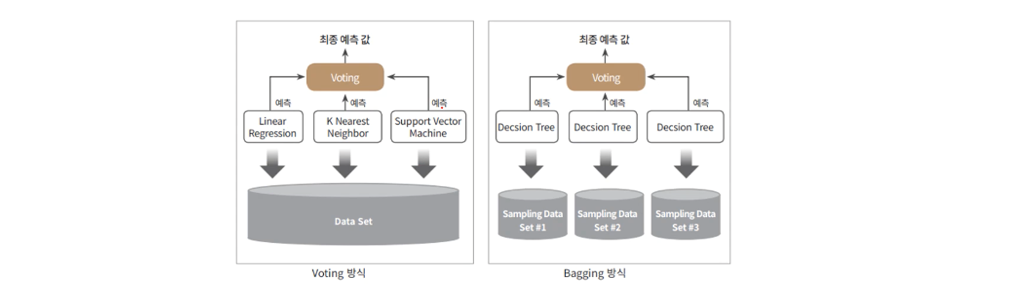

### 보팅 유형

* 하드 보팅: 각 분류기가 내놓은 결과를 다수결로 클래스 결정
* 소프트 보팅: 각 분류기가 측정한 클래스별 확률값을 평균하여 결정(predict_proba())
* 일반적으로 소프트 보팅이 예측 성능이 상대적으로 우수하여 주로 사용됩니다. 

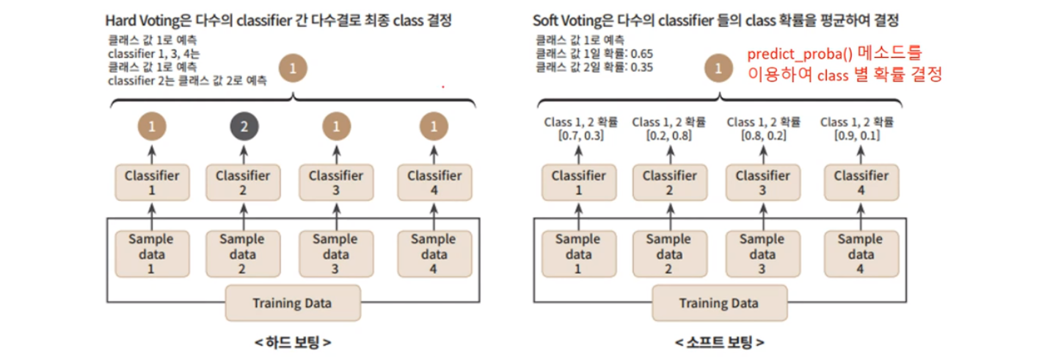

---

### 보팅(Voting)

In [ ]:
# ## 코랩을 사용할 때
# #드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

# #현재 작업 위치 이동
# #띄어쓰기에 \붙일 것
# %cd /content/drive/Othercomputers/내\ 노트북/Devpy_work/02.멀티캠퍼스

Mounted at /content/drive
/content/drive/Othercomputers/내 노트북/Devpy_work/02.멀티캠퍼스


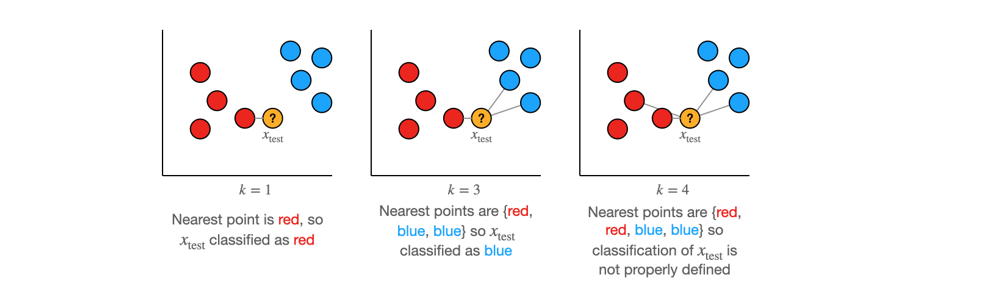

In [1]:
import pandas as pd

# 피처이름 로드 
feature_name_df = pd.read_csv('./dataset/human_activity/features_new.txt', header=None,names=['column_name'])

# 피처이름을 리스트로
feature_name = feature_name_df['column_name'].values.tolist()

# 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
X_train = pd.read_csv('./dataset/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
X_test = pd.read_csv('./dataset/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

# 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
y_train = pd.read_csv('./dataset/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv('./dataset/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)
# svc_clf = SVC(probability=True) # 95.83%
svc_clf = SVC(probability=True,kernel='linear') #96.47


# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf),('SVC',svc_clf)] , voting='soft' ) #소프트 보팅방식

# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))


Voting 분류기 정확도: 0.9647


만약에
실행속도가 빠르고 비교적 알고리즘이 단순한 분류기들을 사용하고 싶을 때가 있습니다. <Br>
하지만 이들은 성능이 다소 낮은 단점이 있습니다. <Br>
그럴때 VotingClassifier + (단순하고 쓰기 편한 분류기1,2,3,4.....)면 개별 분류기만 썼을 때 보다 좀더 좋은 성능을 보입니다. <Br>
</div>  

---

### 배깅(Bagging):랜덤포레스트(Random Forest)

* 앙상블 학습의 대표주자로 안정적인 성능 덕분에 널리 사용됩니다.
* 어떤 모델을 써야할지 모를때 우선 랜덤 포레스트를 시도해봅시다.
* 랜덤포레스트는 결정 트리를 랜덤하게 만들어 결정 트리 숲을 만들어, 각 결정 트리의 예측을 사용해 최종 예측을 만듭니다.

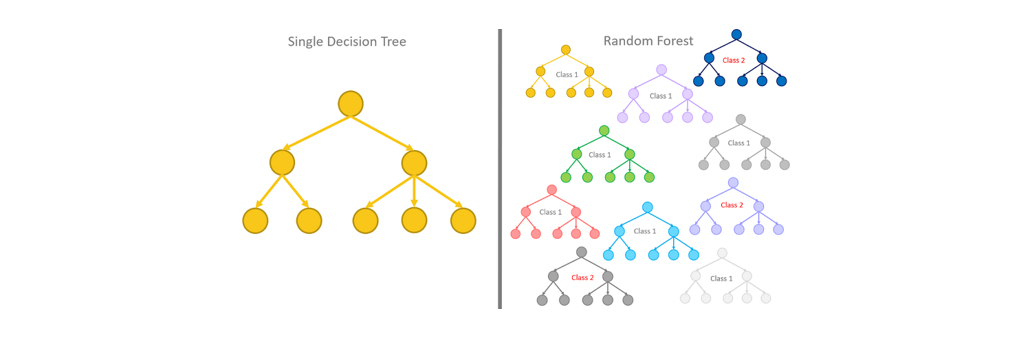

* **부트스트랩(bootstrap sample)방식**으로 훈련데이터를 만듭니다. 
* 이는 데이터 세트에서 **중복을 허용**하여 데이터를 샘플링하는 방식입니다. 
* 가방에 1000개의 샘플이 있을때 1개 뽑고, 다시 가방에 넣고, 다시 1개 뽑아 총 1000개의 훈련 데이터를 만드는 방식입니다. 
* 최악?에는 1000개 모두 같은 값으로 이루어질 수 있겠죠.
* 하지만 여러개를 만들다 보면 일반화를 잘 반영한 훈련데이터가 더 많이 만들어 집니다. 
* Bagging = **B**ootstrap + **Agg**regat**ing**
* 배깅은 부트스트랩 방식으로 훈련데이터를 만들어서 나온 예측을 총계하는 방식


* **노드 분할 방식**은 일부 특성을 무작위로 고른 다음 이 중에 최선의 분할을 찾으며 결정트리를 만든다. 

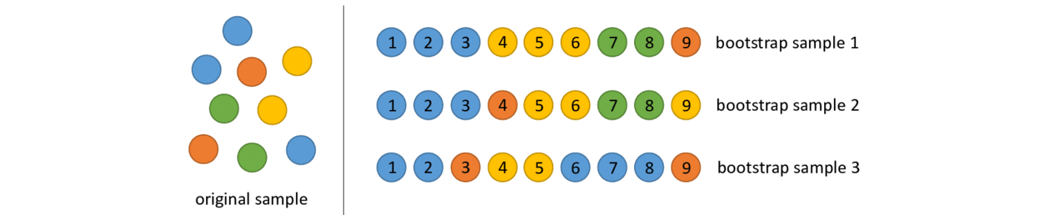

정리

랜덤 포레스트는 랜덤하게 샘플을 선택하고 랜덤하게 특성을 선택하여 훈련하기 때문에 <br>
훈련 세트에 과대적합되는 것을 방지하고, 검증 세트와 테스트 세트에서 안정적인 성능을 얻을 수 있다.<br>

랜덤, 램덤해서 엉터리가 될 것 같지만 이게 자연의 법칙?이어서 더 일반화가 더 잘반영되는 듯 합니다.


#### 하이퍼 파라미터 종류

* n_estimators: 
    * 랜덤 포레스트에서 결정 트리의 개수를 지정합니다. 
    * 디폴트는 10개입니다.
    * 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아닙니다. 
    * 또한 늘릴수록 학습 수행시간이 오래 걸리는 것도 감안해야 합니다. 

* max_feature
    * 결정 트리에 사용된 max_feature 파라미터와 같습니다. 
    * 하지만 RandomForestClassifier의 기본 max_features는 'None'이 아니라, 'auto', 즉, 'sqrt'와 같습니다. 
    * 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조합니다. 
    * 전체 피처가 16개라면 분할을 위해 4개 참조

* max_depth나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있습니다. 


In [3]:
import pandas as pd

# 피처이름 로드 
feature_name_df = pd.read_csv('./dataset/human_activity/features_new.txt', header=None,names=['column_name'])

# 피처이름을 리스트로
feature_name = feature_name_df['column_name'].values.tolist()

# 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
X_train = pd.read_csv('./dataset/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
X_test = pd.read_csv('./dataset/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

# 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
y_train = pd.read_csv('./dataset/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv('./dataset/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)

rf_clf.fit(X_train , y_train)

pred = rf_clf.predict(X_test)

accuracy = accuracy_score(y_test , pred)

print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


> 단일 결정 트리를 사용했을 때 예측 정확도는 0.8717이고 랜덤포레스트를 사용하면 0.9253으로 큰 폭으로 성능이 향상된다.

#### 피처 중요도

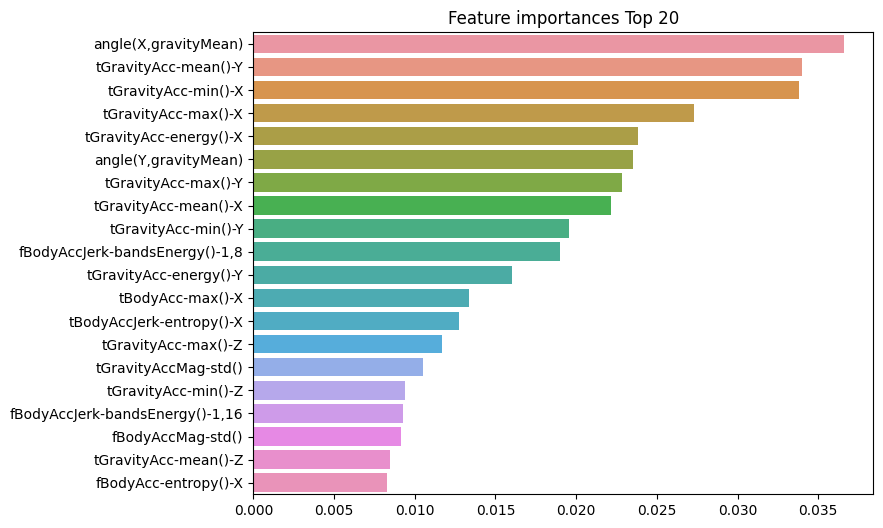

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

---

## 부스팅(Boosting)

* 약한 분류기를 결합하여 강한 분류기를 만드는 과정입니다. 
* 분류기 A, B, C 가 있고, 각각의 0.3 정도의 accuracy를 보여준다고 합시다. 
* A, B, C를 결합하여 더 높은 정확도, 예를 들어 0.7 정도의 accuracy를 얻는 게 앙상블 알고리즘의 기본 원리입니다. 
* Boosting은 이 과정을 **순차적**으로 실행합니다. A 분류기를 만든 후, 그 정보를 바탕으로 B 분류기를 만들고, 다시 그 정보를 바탕으로 C 분류기를 만듭니다. 
* 그리고 최종적으로 만들어진 분류기들을 모두 결합하여 최종 모델을 만드는 것이 Boosting의 원리입니다.
* 장점은 깊이가 얕은 결정 트리를 사용하기 때문에 과대적합에 강하고 높은 일반화 성능을 기대할 수 있다.
* 단점은 일반적으로 그레이디언트 부스팅이 랜덤포레스트보다 조금 더 높은 성능을 얻을 수 있습니다. 하지만 순서대로 트리를 추가하기 때문에 훈련 속도가 느립니다.

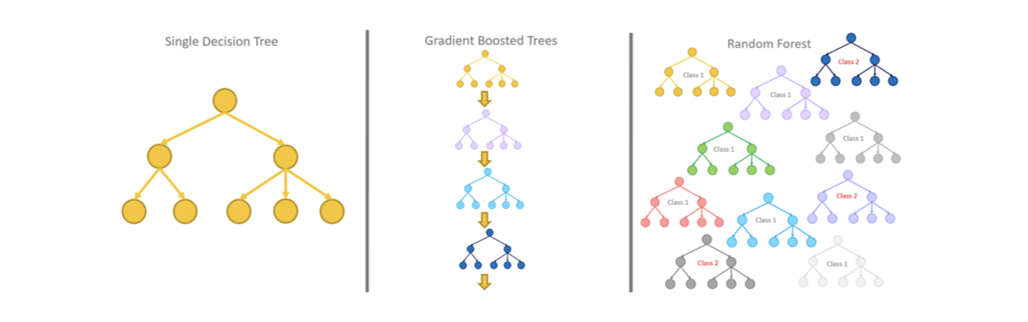

### GBM(Gradient Boosting Machine)

* 부스팅 계열이므로 분류기를 순차적으로 만들어 앙상블을 만듭니다. 
* A분류기를 만들고 이를 바탕으로 오류가 최소가 될 수 있도록 다음 B분류기를 만들때 가중치를 업데이트 합니다.  
* 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용합니다. 


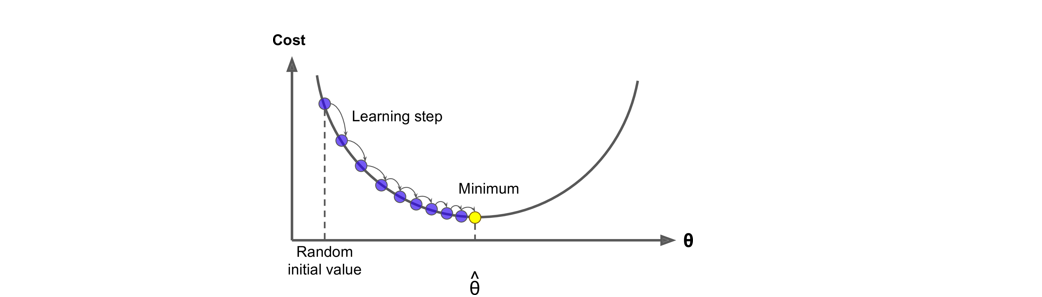

### 하이퍼파라미터 종류

사이킷런은 GBM분류를 위해 GradientBoostingClassifier 클래스를 제공합니다. 

* loss:
    * 경사 하강법에서 사용할 비용 함수를 지정합니다. 
    * 특별한 이유가 없으면 기본값인 'deviance'를 그대로 적용합니다. 
* learning_rate:
    * GBM이 학습을 진행할 때마다 적용하는 학습률입니다. 
    * Weak learner가 순차적으로 오류값을 보정해 나가는 데 적용하는 계수입니다. 
    * 0~1사이의 값을 지정할 수 있으며 기본값은 0.1입니다. 
    * 너무 작은 값을 적용하면 업데이트 되는 값이 작아져서 최소 오류 값을 찾아 예측 성능이 높아질 가능성이 높습니다. 
    * 하지만 많은 weak learner는 순차적인 반복이 필요해서 수행 시간이 오래 걸리고,
    * 또 너무 작게 설정하면 모든 weak learner의 반복이 완료되도 최소 오류 값을 찾지 못할 수 있습니다. 
    * 반대로 큰 값을 적용하면 최소 오류 값을 찾지 못하고 그냥 지나쳐 버려 예측 성능이 떨어질 가능성이 높아지지만, 빠른 수행이 가능합니다. 

* n_estimators:
    * weak learner의 개수입니다. 기본값 100
    * weak learner가 순차적으로 오류를 보정하므로 개수가 많을 수록 예측 성능이 일정 수준까지는 좋아질 수 있습니다. 
    * 하지만 개수가 많을수록 수행 시간이 오래 걸립니다. 
* subsample:
    * weak learner가 학습에 사용하는 데이터의 샘플링 비율입니다. 
    * 이는 전체 학습 데이터를 기반으로 학습한다는 의미입니다. 
    * 0.5이면 학습 데이터의 50%
    * 과적합이 염려되는 경우 subsample을 1보다 작은 값으로 설정합니다. 

In [5]:
import pandas as pd

# 피처이름 로드 
feature_name_df = pd.read_csv('./dataset/human_activity/features_new.txt', header=None,names=['column_name'])

# 피처이름을 리스트로
feature_name = feature_name_df['column_name'].values.tolist()

# 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
X_train = pd.read_csv('./dataset/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
X_test = pd.read_csv('./dataset/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

# 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
y_train = pd.read_csv('./dataset/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv('./dataset/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))


GBM 정확도: 0.9389
GBM 수행 시간: 545.0 초 


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
gb_grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
gb_grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', gb_grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gb_grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = gb_grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9410


---

## 앙상블의 효과

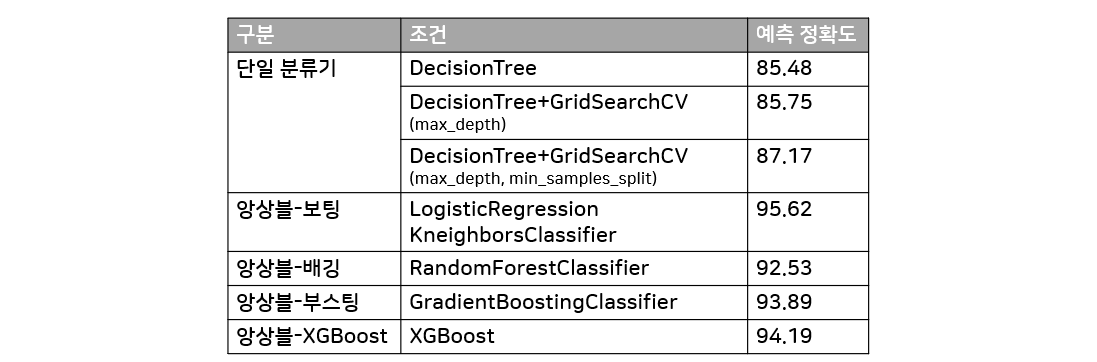